In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def spline_rep(x, degree, knots):
    bases = np.stack([x**d for d in range(1, degree+1)], axis=1)
    diffs = x.reshape(-1, 1) - knots.reshape(1, -1)
    addn = np.maximum(diffs, 0)**degree
    return np.concatenate(
        [bases, addn.reshape(x.shape[0], -1)], axis=1
    )

## Logo

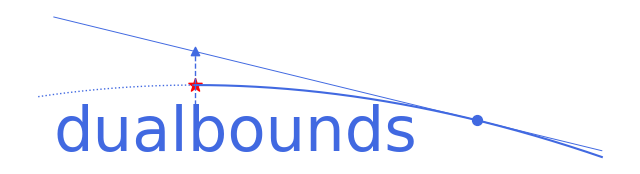

In [44]:
global_color = 'royalblue'
#global_color = '#2194F3' # the blue used in sphinx immaterial
#global_color = '#006400' #'#228B22' # forest green 
color = global_color
starcolor = 'red'


# Define a concave function
a = 1
b = 4
def f(x):
    return -a * x**(1.5) + b*x

xopt = (b / a)**2 / 2.25
xhat = xopt + 2.0
dxhat = - a * 1.5 * np.sqrt(xhat) + b

# Generate x values
x = np.linspace(xopt, 10, 400)
xdot = np.linspace(6, xopt, 400)
newx = np.linspace(xhat-3, x.max(), 20)

# Calculate y values for the concave function
y = f(x)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 2))

# Plot the concave function
ax.plot(x, f(x), color=color)
ax.scatter(
    xopt, f(xopt), color=starcolor, marker='*', s=100, alpha=1
)
ax.scatter(
    xhat, f(xhat), color=color, marker='o', s=50,
)
ax.plot(
    newx, dxhat * (newx - xhat) + f(xhat), color=color,
    linewidth=0.7,
)
estimate = dxhat * (xopt - xhat) + f(xhat)
ax.scatter(
    xopt, estimate, marker='^', color=color,
)
ax.plot(
    [xopt, xopt], [f(xopt)-0.3, estimate], color=color, linestyle='dashed',
    linewidth=1,
)
ax.plot(
    xdot, f(xdot), color=color, linestyle='dotted',
    linewidth=1,
)
ax.text(
    xopt+0.2848, f(x).min()-0.1, "dualbounds", 
    color=color,
    ha='center',
    va='bottom',
    size=45,
)

# Show the plot
plt.axis("off")
plt.savefig("images/logo.svg", dpi=500, bbox_inches='tight', transparent=True)
plt.show()

## Small logo and favicon

In [ ]:
linewidth = 10
dotsize = 750

# Define a concave function
a = 1
b = 10
degree = 2

# Optimum and lienar approximation
xopt = (b / (a * degree))**(1/(degree-1))
xhat = xopt + 4
dxhat = - a * degree * (xhat)**(degree-1) + b

def f(x):
    return -a * np.abs(x)**(degree) + b*x

for color1, color2, savename, width in zip(
    [global_color, global_color],
    [global_color, global_color],
    ['smalllogo', 'favicon'],
    [4, 2],
):
    # Generate x values
    x = np.linspace(xopt-5, xopt+15, 100)
    newx = np.linspace(x.min(), x.max(), 20)
    
    # Calculate y values for the concave function
    y = f(x)
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(width, 2))
    
    # Plot the concave function
    ax.plot(x, f(x), color=color1, linewidth=linewidth)
    ax.plot(
        newx, dxhat * (newx - xhat) + f(xhat) + linewidth, 
        color=color2,
        linewidth=linewidth/1.5,
        linestyle='dashed',
        zorder=1,
    )
        
    # estimate = dxhat * (xopt - xhat) + f(xhat)
    
    # ax.plot(
    #     [xopt, xopt], [f(xopt), estimate], color=color5, linestyle='solid',
    #     dashes=(1,0.3),
    #     linewidth=linewidth/2,
    #     zorder=2,
    # )
    # ax.scatter(
    #     xopt, estimate, marker='^', color=color5, s=dotsize, zorder=3,
    # )
    # ax.scatter(
    #     xhat, f(xhat), color=color3, marker='o', s=dotsize, zorder=3,
    #     edgecolor='black',
    # )
    # ax.scatter(
    #     xopt, f(xopt), color=color2, marker='*', s=1.5*dotsize, alpha=1, zorder=3,
    #     edgecolor='black',
    # )
    
    # Show the plot
    plt.axis("off")
    plt.savefig(f"images/{savename}.svg", bbox_inches='tight', transparent=True)
    plt.show()
    print("done")

## Option 2

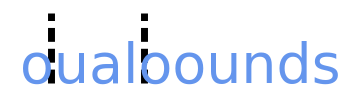

In [524]:
width = 4.4
height = 1
fig, ax = plt.subplots(figsize=(width, height))
ax.text(
    0.5, 0.5, "oualoounds", ha='center', va='center',
    color='cornflowerblue',
    size=40
)
for xval, ymin, ymax in zip(
    [0.12, 0.3925], 
    [0.472, 0.472], 
    [0.6, 0.6],
):
    ax.plot(
        [xval, xval], 
        [ymin, ymax], 
        color='black',
        linewidth=5,
        linestyle='dashed',
        dashes=(2, 1)
    )

ax.set_xlim(0, 1)
plt.axis("off")
plt.show()

## Option 3

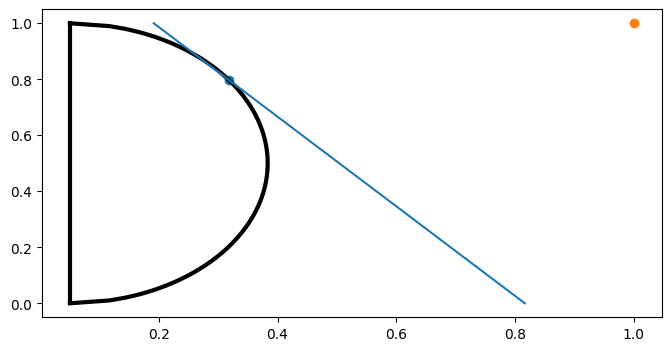

In [521]:
fig, ax = plt.subplots(figsize=(8,4))
Dx = 0.05
ax.plot([Dx, Dx], [0,1], color='black', linewidth=3)
x = np.linspace(0, 1, 100)
#fx = -np.abs(x-0.5)**(2)
fx = np.sqrt(1 - (1-2*x)**2) / 3
fx -= fx.min() - Dx
fpx = 2 * (1 - 2*x) / fx / 6
plt.plot(fx, x, color='black', linewidth=3)
delta = 0.3
ui = np.argmin(np.abs(x-0.5-delta))
plt.plot(fpx[ui] * (x - x[ui]) + fx[ui], x)
plt.scatter(fx[ui], x[ui])

plt.scatter(1, 1)